# Исследование данных о российском кинопрокате

**Заказчик** — Министерство культуры Российской Федерации

**Цель** - определить текущие тренды

**Гипотезы** 
1. Фильмы, получившие господержку, интересны зрителю
2. Господдержку получают фильмы, входящие в тренды, то есть не отличающиеся от основной массы фильмов

**Ход исследования**:
1. Ознакомление с предоставленной информацией
2. Предварительная обработка информации, включающая:
- изменение типов столбцов;
- удаление дубликатов;
- замена, по возможности, пропущенных значений;
- расчет недостающих данных
3. Исследовательский анализ данных:
- расчет доли фильмов, имеющих информацию о прокате, визуализация количества фильмов в прокате по годам, изучение динамики;
- расчет и визуализация средней и медианной суммы сборов для каждого года
- определение влияния возрастного ограничения аудитории на сборы фильма в прокате в период с 2015 по 2019 год
- исследование фильмов, получивших гос.поддержку, проверка гипотез
4. Общий вывод

**Терминология**:

**Прокатное удостоверение**  — документ, дающий право на прокат (демонстрацию) фильма на территории Российской Федерации, а также на его тиражирование и распространение, в том числе по кабельным или эфирным каналам. Удостоверение выдаётся уполномоченным органом — Министерством культуры РФ. Если прокатное удостоверение на фильм не выдавалось обладателю исключительных прав на этот фильм, то на один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма (при этом срок действия каждого прокатного удостоверения будет ограничиваться сроком действия соответствующего лицензионного договора).

## Ознакомление с информацией

В данном проекте у нас два источника информации - `mkrf_movies.csv` - данные о прокатных удостоверениях и `mkrf_shows.csv`- данные о прокате в российских кинотеатрах.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Импортируем все необходимые библиотеки, а также зададим некоторые общие настройки

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
#pd.set_option('float_format', '{:f}'.format)
sns.set(context='notebook', style='whitegrid', 
        palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc={'figure.figsize':(10,5)} )

Прочитаем данные в dataframes

In [2]:
path1 = os.path.join('/', 'datasets', 'mkrf_movies.csv')
path2 = os.path.join('datasets', 'mkrf_movies.csv')
path3 = os.path.join('mkrf_movies.csv')
if os.path.exists(path1):
    df1 = pd.read_csv(path1)
    display(df1.head())
elif os.path.exists(path2):
    df1 = pd.read_csv(path2)
    display(df1.head())
else:
    df1 = pd.read_csv(path3)
    display(df1.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
path4 = os.path.join('/', 'datasets', 'mkrf_shows.csv')
path5 = os.path.join('datasets', 'mkrf_shows.csv')
path6 = os.path.join('mkrf_shows.csv')
if os.path.exists(path4):
    df2 = pd.read_csv(path4)
    display(df2.head())
elif os.path.exists(path5):
    df2 = pd.read_csv(path5)
    display(df2.head())
else:
    df2 = pd.read_csv(path6)
    display(df2.head())


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [4]:
df2.round(0)

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.0
3,111000117,12260956.0
4,111000118,163684058.0
...,...,...
3153,224014814,1530.0
3154,224021411,9270.0
3155,224022410,400.0
3156,224023210,360.0


Посмотрим на общую информацию о таблицах

In [5]:
def observe_data(table):
    '''Giving common understanding of data in dataframe'''
    print ('Случайная запись таблицы')
    display(table.sample())
    print('_'*100)
    print(f'Количество записей в таблице: {table.shape[0]} \nKоличество столбцов в таблице: {table.shape[1]}')
    print('_'*100)
    names_columns = table.columns
    print(f'Названия столбцов: {names_columns}')
    print('_'*100)
    names_to_corrige = []
    for name_column in names_columns:
        if not name_column.islower() or ' ' in name_column:
            names_to_corrige.append(name_column)
    if len(names_to_corrige) == 0:
        print ('Название столбцов корректно')
    else:
        print(f'Название следующих колонок должны быть откорретированы: {names_to_corrige}')
    print('_'*100)
    lost_values = table.isna().sum()
    missed_values = lost_values.to_frame(name='missed_values')
    missed_values['percent'] = round(table.isna().mean()*100, 0)
    print ('Пропущенные значения в абсолютном и относительном выражениях:')
    display(missed_values)
    print('_'*100)
    print('Типы данных в колонках:')
    print(table.dtypes)
    print('_'*100)
    print(f'Количество явных дубликатов: {table.duplicated().sum()}', 
          f'что составляет {round(table.duplicated().mean()*100, 0)} % от всех записей')

In [6]:
observe_data(df1)

Случайная запись таблицы


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
6176,Молодое вино,111015918,2018-09-01T12:00:00.000Z,Художественный,"ООО ""ХитФильм Продакшн""",Россия,П.Олевский,А.Шипулина,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.5,драма


____________________________________________________________________________________________________
Количество записей в таблице: 7486 
Kоличество столбцов в таблице: 15
____________________________________________________________________________________________________
Названия столбцов: Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')
____________________________________________________________________________________________________
Название следующих колонок должны быть откорретированы: ['puNumber']
____________________________________________________________________________________________________
Пропущенные значения в абсолютном и относительном выражениях:


,missed_values,percent
title,0,0.0
puNumber,0,0.0
show_start_date,0,0.0
type,0,0.0
film_studio,18,0.0
production_country,2,0.0
director,9,0.0
producer,568,8.0
age_restriction,0,0.0
refundable_support,7154,96.0


____________________________________________________________________________________________________
Типы данных в колонках:
title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object
____________________________________________________________________________________________________
Количество явных дубликатов: 0 что составляет 0.0 % от всех записей


In [7]:
observe_data(df2)

Случайная запись таблицы


,puNumber,box_office
2303,121027019,5192182.2


____________________________________________________________________________________________________
Количество записей в таблице: 3158 
Kоличество столбцов в таблице: 2
____________________________________________________________________________________________________
Названия столбцов: Index(['puNumber', 'box_office'], dtype='object')
____________________________________________________________________________________________________
Название следующих колонок должны быть откорретированы: ['puNumber']
____________________________________________________________________________________________________
Пропущенные значения в абсолютном и относительном выражениях:


,missed_values,percent
puNumber,0,0.0
box_office,0,0.0


____________________________________________________________________________________________________
Типы данных в колонках:
puNumber        int64
box_office    float64
dtype: object
____________________________________________________________________________________________________
Количество явных дубликатов: 0 что составляет 0.0 % от всех записей


### Объединение данных

Поскольку мы хотим объединить две таблицы, нас интересует по какому столбцу мы их будем объединять - в данном случае это столбец `puNumber`. Однако его тип в первой таблице не соответсвует типу во второй - `object` и `int` соответственно. Поскольку при попытке преобразования `puNumber` из `df1` возникает ошибка - "invalid literal for int() with base 10: 'нет'", посмотрим, действительно ли в записях первой таблицы присутствует значение 'нет' в столбце `puNumber`

In [8]:
df1.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Возникает предположение, что данный фильм не имеет прокатного удостоверения, либо информация о нем была утеряна - удалим данную запись и преобразуем столбец `puNumber` из `df1` к `int`

In [9]:
df1['puNumber'] = pd.to_numeric(df1['puNumber'], errors = 'coerce')
df1['puNumber'].dtype

dtype('float64')

In [10]:
df1 = df1.query('puNumber.notnull()', engine = 'python')
df1['puNumber'] = df1['puNumber'].astype('int')
df1['puNumber'].dtype

dtype('int32')

In [11]:
df = df1.merge(df2, on = 'puNumber', how = 'left')

### Общая информация о полученных данных

In [12]:
observe_data(df)

Случайная запись таблицы


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1037,Измена .,111003612,2012-07-31T12:00:00.000Z,Художественный,"ООО ""Студия ""Слон""",Россия,К.Серебренников,С.Еремеева,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"триллер,драма",NaN


____________________________________________________________________________________________________
Количество записей в таблице: 7485 
Kоличество столбцов в таблице: 16
____________________________________________________________________________________________________
Названия столбцов: Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')
____________________________________________________________________________________________________
Название следующих колонок должны быть откорретированы: ['puNumber']
____________________________________________________________________________________________________
Пропущенные значения в абсолютном и относительном выражениях:


,missed_values,percent
title,0,0.0
puNumber,0,0.0
show_start_date,0,0.0
type,0,0.0
film_studio,18,0.0
production_country,2,0.0
director,9,0.0
producer,568,8.0
age_restriction,0,0.0
refundable_support,7153,96.0


____________________________________________________________________________________________________
Типы данных в колонках:
title                     object
puNumber                   int32
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object
____________________________________________________________________________________________________
Количество явных дубликатов: 0 что составляет 0.0 % от всех записей


**Выводы:**
- явных дубликатов не выявлено
- необходимо откорректировать название столбца `puNumber`
- пропуски, составляющие менее 1% в столбцах: `film_studio`, `production_country`, `director`
- очень значительные пропуски 96%  в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`	
- наличие пропусков в столбцах `producer` (8%), `ratings` (13%), `genres` (13%), `box_office` (58%)	
- столбец `show_start_date` необходимо привести к типу `datetime`, также можно превести столбец `ratings` к типу `float` 

## Предварительная обработка данных


### Изменение заголовка столбца `puNumber`

In [13]:
df = df.rename(columns = {'puNumber': 'pu_number'})

### Изменение типа данных и размерности данных

Изменим тип данных в столбце `show_start_date` на `datetime`

In [14]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

Изменим тип столбца `ratings` на `float`

In [15]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [16]:
df.query('ratings == "99%"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1804,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4295.0
6881,Животные рядом со Святыми,112003719,2019-05-03 12:00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,99%,"криминал,драма",NaN


In [17]:
df['ratings'] = pd.to_numeric(df['ratings'], errors = 'coerce')

Переведем столбцы из рублей в млн.руб и округлим

In [18]:
df['refundable_support'] = round((df['refundable_support']/1000000), 2)
df['nonrefundable_support'] = round((df['nonrefundable_support']/1000000), 2)
df['budget'] = round((df['budget']/1000000), 2)
df['box_office'] = round(df['box_office']/1000000, 2)


Проверим внесенные изменения

In [19]:
df.dtypes

title                            object
pu_number                         int32
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

In [20]:
df.query('budget.notnull() and budget != 0', engine = 'python').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.50,79.41,Министерство культуры,8.1,"драма,мелодрама",0.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.00,37.14,Министерство культуры,NaN,NaN,0.03
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.85,176.02,Фонд кино,5.3,"комедия,фантастика",19.96
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28.00,40.57,Министерство культуры,4.2,драма,0.06
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25.00,40.02,Министерство культуры,6.4,драма,0.23


### Работа с пропусками 

Для наглядности визуализируем пропуски:

<AxesSubplot:>

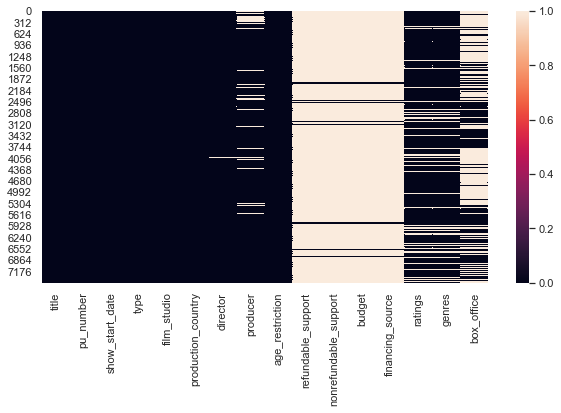

In [21]:
sns.heatmap(df.isna())

#### Пропуски в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`

Как мы видим огромнейшее количество пропусков присутствует в столбцах **`refundable_support`, `nonrefundable_support`, `budget`, `financing_source`**. Данные пропуски обусловлены природой самих столбцов, которые могут быть заполнены только для фильмов, получивших господдержку. Для оставшихся 96% фильмов, не получавших гос.поддержку, мы не можем заполнить NaN без привленчения сторонних источников информации для столбца `budget`. Несосмненно NaN `refundable_support`, `nonrefundable_support` и `financing_source` могут быть заполнены нулями, но в дальнейшем, для разделения фильмов с гос.поддержкой и без, удобнее иметь именно NaN. Оставим пропуски без изменений. 

####  Пропуски в `box_office`

Поскольку данные box_office взяты из таблицы, которая содержит сведения о показах фильмов в российских кинотеатрах в количестве 3158, а в основной таблице содержатся 7486 записей (без явно выявленных дубликатов), то наличие пропусков в данном столбце неудивительно. 
Можно предположить, что, поскольку прокатное удостоверение выдается не только для проката фильма в кинотеатрах, но и для его транслирования по телевидению и другим каналам информации, фильмы, имеющие пропуск в данном столбце просто не были в прокате в кинотеатрах. С другой стороны, мы не можем отклонить гипотезу о неполноте данных во второй таблице. Таким образом, можно запросить дополнительную информацию по выявлению факта проката фильма в российских кинотеатрах. Естественно, NaN в данном столбце оставим без изменения

####  Пропуски в `ratings` и `genres`

Информация в данных столбцах явно взята с сайта Кинопоиск. Выбирем первые пять строк из записей с пропущенными значениями в изучаемых столбцах

In [22]:
df.query('ratings.isna() and genres.isna()').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


При непосредственном поиске на сайте Кинопоиск по выведенным названиям фильмов мы можем увидеть и их жанр и их рейтинг, которые отсутсвуют в нашей исходной информации. Например, для фильма Полустанок https://www.kinopoisk.ru/film/43109/? рейтинг 7.0, жанр - мелодрама, комедия. Мы убедились, что присутствие NaN в столбцах `ratings` и `genres` вызвано неполнотой выгрузки данных с сайта Кинопоиск или отсутствием обновления информации, в дальнейшем данная информация должна быть сообщена тех.поддержке, отвечающей за качество выгрузки. Кроме того рейтинг на сайте кинопоиск высчитывается только для полонометражных фильмов, набравших более 500 оценок, то есть пропуски в столбце `ratings` также могут быть обусловлены его отсутствием как такового. Не исключаем и возможность отсутствия некоторых фильмов на сайте. Заменим пропущенные значения на `unknown` в `genres` и оставим NaN в `ratings` для того, чтобы столбец по прежнему имел числовой тип

In [23]:
df['genres'] = df['genres'].fillna('unknown')

#### Пропуски в `film_studio`, `production_country`, `director`, `producer`

Посмотрим пропуски в `production_country` - их всего два

In [24]:
df.query('production_country.isna()', engine = 'python')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",0.19
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Здесь очевидно, что для обеих записей `production_country` - это Россия. Можно, в принципе, заполнить

In [25]:
df['production_country'] = df['production_country'].fillna('Россия')

Для остальных столбцов `film_studio`,  `director`, `producer` недостающую информацию можно также вручную найти на сайте Кинопоиск - то есть опять же возникает подозрение на недостаточную качественную выгрузку данных. Кроме того, мы не исключаем, что каких-либо фильмы, содержащиеся в наших данных, отсутствуют на сайте. В любом случае, заменим NaN на `unknown`

In [26]:
df['film_studio'] = df['film_studio'].fillna('unknown')
df['director'] = df['director'].fillna('unknown')
df['producer'] = df['producer'].fillna('unknown')

**Вывод:**
- значения NaN оставлены в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `box_office` за неимением возможности их заполнить по имеющейся информации.
- два пропущенных значения в `production_country` заменены на 'Россия'
- значения NaN в столбцах `film_studio`, `production_country`, `director`, `producer` и `genre` заменены на `unknown`
- возникло допущение о не совсем качественной выгрузке информации с сайта Кинопоиск (или об отсутствии ее обновления), в связи с чем данные в ряде столбцов оказались незаполненными, несмотря на присутствующую на сайте необходимую информацию. 

### Дубликаты в датафрейме

У нас могут быть дубликаты с разными прокатными удостоверниями и разными датами выхода в прокат, но представляющими собой один и тот же фильм, проверим это. При этом учтем, что два разных фильма могут называться одинаково. Однако вероятность встретить два разных фильма с одним названием, одним и тем же режиссером и директором, очень мала. Поэтому мы считаем за дубликаты только фильмы с одинаковыми названиями и производителями, которые в прокате имели идентичные сборы

In [27]:
df = df.drop_duplicates(subset= ['title', 'director', 'producer', 'film_studio', 'box_office']).reset_index(drop = True)

In [28]:
len(df)

6996

Посмотрим, есть ли повторение названий в столбце `title`

In [29]:
df['title'].value_counts()

Прощание                      4
Гадкий Я                      3
Лесной патруль                3
Багровый пик                  3
Арктика 3D                    3
                             ..
Обитаемая Луна, 21 век        1
День мертвецов: Злая кровь    1
Выхода нет_                   1
Кукловод                      1
Неваляшка - 2                 1
Name: title, Length: 6771, dtype: int64

Как мы видим у нас до сих пор присутствуют фильмы с одинаковыми названиями. Посмотрим фильм "Прощание"

In [30]:
df.query('title == "Прощание"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
261,Прощание,111029414,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Климов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
5029,Прощание,211037617,2017-09-07 12:00:00,Художественный,Всероссийский государственный институт кинемат...,Россия,А.Петровская,В.Найговзина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
6419,Прощание,111007519,2019-05-01 12:00:00,Художественный,ИП Киселев Алексей Евгеньевич,Россия,М.Фомина,А.Киселев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
6791,Прощание,121028719,2019-10-07 12:00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,2.62


Мы убедились, что существует 4 независимых фильма с названием "Прощай", созданные разными авторами. Смущает, что все 4 имеют одинаковый рейтинг и жанр.
Если мы зайдем на Кинопоиск то увидим лишь два фильма Прощание - Климова и Лулу Ванг, при этом для фильма Климова рейтинг - 7.8, для Лулу Ванг - 7.2. Хотя в табличных данных для всех четырех фильмов указан один и тот же жанр, и один и тот же рейтинг. Посмотрим фильм "Успех"

In [31]:
df.query('title == "Успех"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
303,Успех,111027414,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,драма,NaN
5452,Успех,111008418,2018-06-14 12:00:00,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,драма,NaN
6832,Успех,111018519,2019-11-04 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5.0,20.0,75.0,Фонд кино,7.8,драма,3.18


На сайте Кинопоиск:

Успех Руминова - 5.2 комедия, мелодрамма
Успех Худякова - 7.8 драма
Успех Сунцова - короткометражка, комедия, рейтинг отсутвует
В таблице все три фильма имеют один и тот же рейтинг и одну и тот же жанр

**Вывод**
- мы удалили дубликаты, для строк с одинаковым названием, режиссером и продюсером
- выявили информацию для написания Bug-report: **Для фильмов с одинаковыми названиями, но не являющимися идентичными, настроить более точную выгрузку информации с Кинопоиска, не только на основе названия фильма, но и его дополнительных атрибутов c цльб корректного определения жанра и рейтинга**

### Категориальные значения

В данных присутствуют следующие категориальные значения: title, type, film_studio, production_country, director, producer, age_restriction, financing_source, genres

**Какие-либо проблемы отсутствуют для столбцов `age_restriction`, `financing_source`, `genres`, `production_country` - значения записаны в одном стиле**

In [32]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2586
«12+» - для детей старше 12 лет           1519
«18+» - запрещено для детей               1486
«0+» - для любой зрительской аудитории     783
«6+» - для детей старше 6 лет              622
Name: age_restriction, dtype: int64

In [33]:
df['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [34]:
df['genres'].value_counts()

unknown                         970
драма                           457
комедия                         334
мелодрама,комедия               183
драма,мелодрама                 172
                               ... 
боевик,военный,история            1
ужасы,мелодрама,детектив          1
драма,боевик,история              1
комедия,семейный,фэнтези          1
мелодрама,приключения,боевик      1
Name: genres, Length: 743, dtype: int64

In [35]:
df['production_country'].value_counts()

США                                                               1886
Россия                                                            1815
СССР                                                               345
Франция                                                            282
Великобритания                                                     244
                                                                  ... 
США-Нидерланды                                                       1
США, Великобритания, Люксембург                                      1
Великобритания, Южная Корея, Канада, США, Индия, Китай, Япония       1
Германия - Нидерланды - Беларусь - Россия - Латвия                   1
Германия-Франция-Польша                                              1
Name: production_country, Length: 950, dtype: int64

**Для title, film_studio, director, producer можно выделить следующие проблемы:**
- присутствие '.', '_', '-' в конце значения
- присутствие лишних пробелов
- отсутствие единого стиля в записи (Пример: /По произведению Янна Мартела/, /По книге Анастасии Арнольд "Страсть Мари"/', БиБиСи, Би Би Си, Би-Би-Си)

Выводы закоментированы, поскольку выдают ну уж очень длинные списки уникальных значений

In [36]:
#df['title'].unique().tolist()
#df['film_studio'].unique().tolist()
#df['director'].unique().tolist()
#df['producer'].unique().tolist()

Рассмотрим уникальные значения `type`

In [37]:
df['type'].value_counts()

Художественный                4060
 Художественный               1387
Анимационный                   811
Прочие                         399
Документальный                 284
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

Удалим лишние пробелы

In [38]:
df['type'] = df['type'].str.strip()

In [39]:
df['type'].value_counts()

Художественный                5447
Анимационный                   812
Прочие                         399
Документальный                 284
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

**Вывод**

Записи в столбцах `title`, `film_studio`, `director`, `producer` содержат избыточное количество пунктуационных знаков, пробелов, использование букв в верхнем регистре вместо нижнего, также отмечается отсутствие какого-либо единого стиля для записи названий.

Столбцы `age_restriction`, `financing_source`, `genres`, `production_country`  содержат корректно записанную информацию.

Из столбца `type` удалены пробелы в начале и конце значения

### Количественный значения


В наших данных присутствуют следующие количественные значения `refundable_support`, `nonrefundable_support`, `budget`, `box_office`

#### Соотношение между бюджетом и объемом господдержки

Поскольку бюджет фильма не может быть меньше гос.поддержки, то если такие записи присутствуют в таблице необходимо заменить значение бюджета на сумму `refundable_support` и `nonrefundable_support`, то есть на общую сумму гос.поддержки. 

In [40]:
len(df.query('refundable_support + nonrefundable_support > budget'))

17

Заменим значения бюджета в данном случае на общую сумму гос.поддуржки

In [41]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

In [42]:
df['ratio_state_support'] = round((df['refundable_support'] + df['nonrefundable_support'])/df['budget']*100, 0)

In [43]:
medians = df.groupby('year', as_index = False)['ratio_state_support'].median().rename(columns = {'ratio_state_support':'medians'})
display(medians)
df = df.merge(medians, on = 'year', how = 'left')
df['medians'].isna().sum()

,year,medians
0,2010,NaN
1,2011,NaN
2,2012,NaN
3,2013,47.0
4,2014,58.0
5,2015,62.0
6,2016,64.0
7,2017,52.0
8,2018,59.5
9,2019,58.5


1827

In [44]:
#changing using median of ratio support/budget grouped by year
df.loc[((df['refundable_support'] + df['nonrefundable_support']) > df['budget']) & (df['medians'].notnull()), 'budget'] = (
    df['refundable_support'] + df['nonrefundable_support'])/df['medians']
#changing using min of medians if in grouped by year data for years 2010-2012 where medians = NaN
df.loc[((df['refundable_support'] + df['nonrefundable_support']) > df['budget']) & (df['medians'].isna()), 'budget'] = (
    df['refundable_support'] + df['nonrefundable_support'])/df['medians'].min()

In [45]:
df = df.drop(labels = ['medians'], axis = 1)

Кроме того мы знаем, что `refundable_support` и `nonrefundable_support` не могут быть одновременно нулями. Проверим, имеются ли такие записи

In [46]:
len(df.query('refundable_support == 0 and nonrefundable_support == 0'))

0

#### Выбросы в столбце `budget`, `refundable_support` и `nonrefundable_support`

Посмотрим на столбец `budget`

In [47]:
df['budget'].describe()

count     332.000000
mean      127.298874
std       188.541581
min         0.093750
25%        42.000000
50%        68.650000
75%       141.982500
max      2305.070000
Name: budget, dtype: float64

Посчитаем возможные выбросы. 

In [48]:
def find_outliers (table, column, percent_of_outliers = 5):
    #check outliers by standart deviation
    fig, ax =plt.subplots(1,2)
    sns.distplot (table[column].dropna(), ax=ax[0] )
    sns.boxplot (data = table, x = column, ax=ax[1])
    fig.show()
    lower_bound_hist = table[column].mean()-3*table[column].std()
    upper_bound_hist = table[column].mean()+3*table[column].std()
    percent_outliers_hist = round(len(table[(table[column] < lower_bound_hist) | (table[column] > upper_bound_hist)])
                                /len(table)*100)
    print(f'Outliers according histogram < {lower_bound_hist.round(2)} and > {upper_bound_hist.round(2)}')
    print(f'Percent of outliers acording histogram {percent_outliers_hist}')
    print('_'*100)
    #check outliers by boxplot - moderate and extreme
    IQR = table[column].quantile(q=0.75) - table[column].quantile(q=0.25)
    lower_bound_boxplot_moderate = table[column].quantile(0.25)-1.5*IQR
    upper_bound_boxplot_moderate = table[column].quantile(0.75)+1.5*IQR
    percent_outliers_boxplot_moderate = round(len(table[(table[column] < lower_bound_boxplot_moderate) | (table[column] > upper_bound_boxplot_moderate)])
                                /len(table)*100)
    print(f'Moderate outliers according boxplot < {lower_bound_boxplot_moderate.round(2)} and > {upper_bound_boxplot_moderate.round(2)}')
    print(f'Percent of moderate outliers acording boxplot {percent_outliers_boxplot_moderate}')
    print('_'*100)
    lower_bound_boxplot_extreme = table[column].quantile(0.25)-3*IQR
    upper_bound_boxplot_extreme = table[column].quantile(0.75)+3*IQR
    percent_outliers_boxplot_extreme = round(len(table[(table[column] < lower_bound_boxplot_extreme) | (table[column] > upper_bound_boxplot_extreme)])
                                /len(table)*100)
    print(f'Extreme outliers according boxplot < {lower_bound_boxplot_extreme.round(2)} and > {upper_bound_boxplot_extreme.round(2)}')
    print(f'Percent of extreme outliers acording boxplot {percent_outliers_boxplot_extreme}')
    print('_'*100)
    #check outliers by quantiles
    lower_bound_quantile = table[column].quantile(q = percent_of_outliers/2/100)
    upper_bound_quantile = table[column].quantile(q = 1 - percent_of_outliers/2/100)
    percent_outliers_quantile = round(len(table[(table[column] < lower_bound_quantile) | (table[column] > upper_bound_quantile)])
                                /len(table)*100)
    print(f'Outliers according quantile < {lower_bound_quantile.round(2)} and > {upper_bound_quantile.round(2)}')
    print(f'Percent of outliers acording quantile {percent_outliers_quantile}')

C:\Users\Utilisateur\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8404\909835626.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Outliers according histogram < -438.33 and > 692.92
Percent of outliers acording histogram 0
____________________________________________________________________________________________________
Moderate outliers according boxplot < -107.97 and > 291.96
Percent of moderate outliers acording boxplot 0
____________________________________________________________________________________________________
Extreme outliers according boxplot < -257.95 and > 441.93
Percent of extreme outliers acording boxplot 0
____________________________________________________________________________________________________
Outliers according quantile < 1.12 and > 554.06
Percent of outliers acording quantile 0


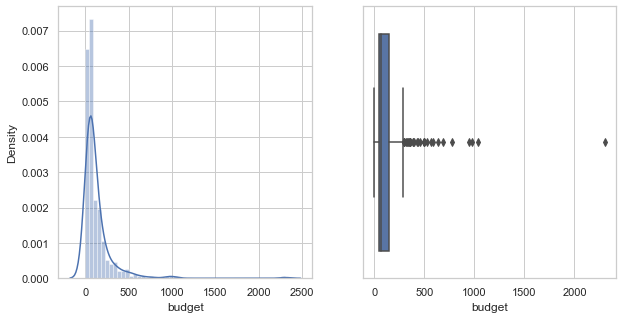

In [49]:
find_outliers(df, 'budget')

Определим вообще объем имеющихся записей, где `refundable_support` имеет заполненные значения

In [50]:
len(df.query('budget.notnull()'))

332

У нас всего 332 записи, поэтому особо отсечь все выбросы не получится. Выберем интревалы, отсекающие экстемальные выбросы и посмотрим сколько при этом записей будет удалено

In [51]:
len(df.query('budget > (4*budget.quantile(0.75) - 3*budget.quantile(q=0.25))'))

15

In [52]:
df = df.query('budget < (4*budget.quantile(0.75) - 3*budget.quantile(q=0.25)) or budget.isna()').reset_index(drop = True)
len(df)

6981

Аналогично поступаем c `refundable_support` и `nonrefundable_support`

C:\Users\Utilisateur\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8404\909835626.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Outliers according histogram < -47.7 and > 66.52
Percent of outliers acording histogram 0
____________________________________________________________________________________________________
Moderate outliers according boxplot < -15.0 and > 25.0
Percent of moderate outliers acording boxplot 1
____________________________________________________________________________________________________
Extreme outliers according boxplot < -30.0 and > 40.0
Percent of extreme outliers acording boxplot 0
____________________________________________________________________________________________________
Outliers according quantile < 0.0 and > 60.0
Percent of outliers acording quantile 0


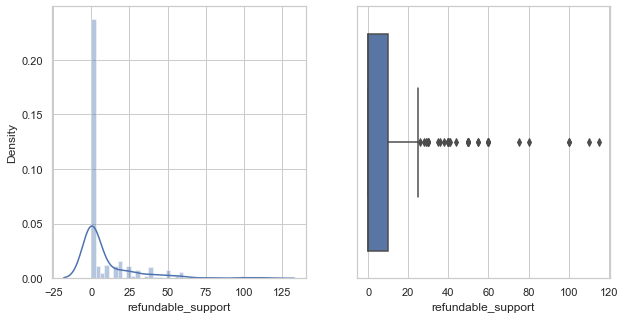

In [53]:
find_outliers(df, 'refundable_support')

In [54]:
len(df.query('refundable_support > (4*refundable_support.quantile(0.75) - 3*refundable_support.quantile(q=0.25))'))

22

In [55]:
df = df.query('refundable_support < (4*refundable_support.quantile(0.75) - 3*refundable_support.quantile(q=0.25)) or refundable_support.isna()').reset_index(drop =True)

C:\Users\Utilisateur\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8404\909835626.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Outliers according histogram < -66.71 and > 144.06
Percent of outliers acording histogram 0
____________________________________________________________________________________________________
Moderate outliers according boxplot < 2.5 and > 62.5
Percent of moderate outliers acording boxplot 0
____________________________________________________________________________________________________
Extreme outliers according boxplot < -20.0 and > 85.0
Percent of extreme outliers acording boxplot 0
____________________________________________________________________________________________________
Outliers according quantile < 5.4 and > 139.85
Percent of outliers acording quantile 0


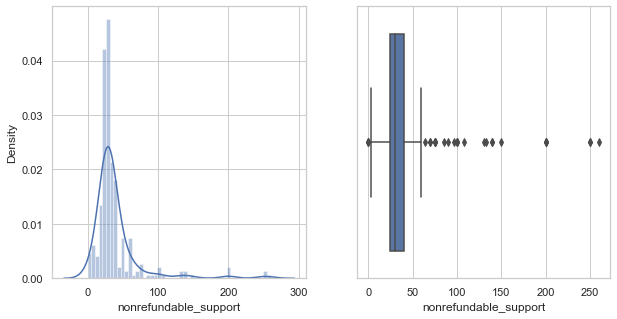

In [56]:
find_outliers(df, 'nonrefundable_support')

In [57]:
len(df.query('nonrefundable_support > (4*nonrefundable_support.quantile(0.75) - 3*nonrefundable_support.quantile(q=0.25))'))

17

In [58]:
df = df.query('refundable_support < (4*nonrefundable_support.quantile(0.75) - 3*nonrefundable_support.quantile(q=0.25)) or refundable_support.isna()').reset_index(drop =True)

**Вывод:**
- мы заменили бюджет на общую сумму гос.поддердки в строках, где `budget` < `refundable_support` + `nonrefundable_support`
- мы проанализировали данные и удалили 54 экстремальных выбросов в столбцах `budget`, `refundable_support`, `nonrefundable_support`


### Расчет дополнительной информации, добавление столбцов `year`, `director_name` и `main_genre`

In [59]:
# created before
#df['year'] = pd.DatetimeIndex(df['show_start_date']).year


In [60]:
df['director_name'] = df['director'].str.split(',').str[0]

In [61]:
df['main_genre'] = df['genres'].str.split(',').str[0]

In [62]:
#created before
#df['ratio_state_support'] = round((df['refundable_support'] + df['nonrefundable_support'])/df['budget']*100, 0)

**Вывод**: мы создали интересующие нас столбцы

Посмотрим, как изменились наши данные после всех проведенных этапов предварительной обработки

In [63]:
observe_data(df)

Случайная запись таблицы


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,ratio_state_support,director_name,main_genre
3979,Утомленные солнцем 2: Предстояние,111004210,2010-04-05 12:00:00,Художественный,"АНО ""Золотой Орёл""",Россия,Н.Михалков,"Н.Михалков, Л.Верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.8,"драма,военный",0.0,2010,NaN,Н.Михалков,драма


____________________________________________________________________________________________________
Количество записей в таблице: 6951 
Kоличество столбцов в таблице: 20
____________________________________________________________________________________________________
Названия столбцов: Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'year',
       'ratio_state_support', 'director_name', 'main_genre'],
      dtype='object')
____________________________________________________________________________________________________
Название столбцов корректно
____________________________________________________________________________________________________
Пропущенные значения в абсолютном и относительном выражениях:


,missed_values,percent
title,0,0.0
pu_number,0,0.0
show_start_date,0,0.0
type,0,0.0
film_studio,0,0.0
production_country,0,0.0
director,0,0.0
producer,0,0.0
age_restriction,0,0.0
refundable_support,6664,96.0


____________________________________________________________________________________________________
Типы данных в колонках:
title                            object
pu_number                         int32
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
year                              int64
ratio_state_support             float64
director_name                    object
main_genre                       object
dtype: object
_____________________________________________________________

**ВЫВОД**
- мы привели заголовки столбцов таблицы к единому стилю
- изменили тип для `show_start_data` на datetime и размерность колонок `refundable_support`, `nonrefundable_support` и `budget`, переведя руб в млн.руб
- мы не заменяли пропуски вычисляемыми значениями и не удаляли записи, содержащие NaN - в ходе исследования было выяснено, что присутствие NaN объясняется 
1. Природой данных - это пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, свойственные записям для фильмов без господдердки
2. Некачественной выгрузкой данных с сайта Кинопоиск (или отсутсвием обновления данных)
3. Возможным отсутвием фильма на сайте Кинопоиска
4. Возможной неполнотой данных по сборам, а также отсутвием информации все ли фильмы, получившие прокатное удостовернение действительно проигрывались в кинотеатрах
- мы выявили скрытые дубликатов - фильмы с идентичными названиями, производством и кассовыми сборами - и удалили их. Обнаружили наличие разных фильмов с одинаковыми названиями, которые тем не менее имеют один и тот же рейтинг и один и тот же жанр. В п.2.4 приведена вся необходимая информация для bug-report: Для фильмов с одинаковыми названиями, но не являющимися идентичными, настроить более точную выгрузку информации с Кинопоиска, не только на основе названия фильма, но и его дополнительных атрибутов c целью корректного определения жанра и рейтинга
- для категориальных данных - title, film_studio, director, producer, type - было выявлено отсутствие единного стиля в записи значений, наличие пробелов и других знаков пунктуации. Значения столбца type стилистически откорректированы
- для количественных данных определены возможные диапазоны их значений, удалены экстремальные выбросы в количестве 54, а также откорректированы 17 значений в столбце `budget`

## Исследовательский анализ данных


### Количество фильмов в прокате в зависимости от года

Создадим сводную таблицу с искомыми результатами, с учетом того, что у нас нет информации по всем фильмам о факте их проката в российских кинотеатрах

In [64]:
films = (df.pivot_table(index = 'year', values = ['box_office', 'title'], aggfunc = 'count')
         .rename(columns = {'box_office': 'film_in_cinema', 'title':'film_with_permission'}))
films

,film_in_cinema,film_with_permission
year,,
2010,104,797
2011,109,495
2012,128,535
2013,184,600
2014,277,753
2015,457,689
2016,517,793
2017,347,492
2018,467,879


In [65]:
films['ratio_cinema_permission'] = round(films['film_in_cinema']/films['film_with_permission']*100, 0)
films

,film_in_cinema,film_with_permission,ratio_cinema_permission
year,,,
2010,104,797,13.0
2011,109,495,22.0
2012,128,535,24.0
2013,184,600,31.0
2014,277,753,37.0
2015,457,689,66.0
2016,517,793,65.0
2017,347,492,71.0
2018,467,879,53.0


Для визуализации результатов построим графические зависимости

Text(0.5, 1.0, 'Количество фильмов в прокате и количество фильмов с прокатным удостовернием по годам')

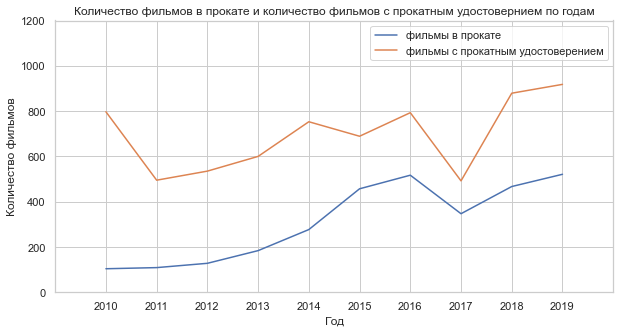

In [66]:
plt.plot(films['film_in_cinema'], label = "фильмы в прокате")
plt.plot(films['film_with_permission'], label = "фильмы с прокатным удостоверением")
plt.legend(loc='upper right')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.xlim(2009, 2020)
plt.ylim(0, 1200)
plt.xticks(ticks= [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], labels=None)
plt.title('Количество фильмов в прокате и количество фильмов с прокатным удостовернием по годам')

**Вывод**
Мы видим, что есть некоторая взаимосвязь между количеством прокатных фильмов и общим количеством фильмов с прокатным удостоверением - графики если и не идут параллельно, то на некоторых участках очень к этому близки. Неудивительно, что макисмальные значения характерны для последнего в исследовании 2019 года - киноиндустрия развивается, производится все больше и больше фильмов, которые выходят в прокат или получают прокатные удостоверения. При этом падение количества фильмов с прокатным удостоверением сильнее, чем падение числа фильмов в прокате в период 2016-2017 гг. Возможно это свзано с принятием постановления об изменениях в требованиях к получению прокатного удостовернения от 27 февраля 2016. Нельзя не брать и в расчеты экономический кризис 2016-2017 г., повлиявший в целом и на объемы выпуска кинопродукции

### Сумма, медиана и среднее сборов в зависимости от года

Для начала проверим достоверность информации в столбце `box_office`

In [67]:
df['box_office'].describe()

count    3111.000000
mean       71.343944
std       228.115529
min         0.000000
25%         0.080000
50%         2.240000
75%        22.030000
max      3073.570000
Name: box_office, dtype: float64

C:\Users\Utilisateur\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8404\909835626.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Outliers according histogram < -613.0 and > 755.69
Percent of outliers acording histogram 1
____________________________________________________________________________________________________
Moderate outliers according boxplot < -32.85 and > 54.96
Percent of moderate outliers acording boxplot 8
____________________________________________________________________________________________________
Extreme outliers according boxplot < -65.77 and > 87.88
Percent of extreme outliers acording boxplot 6
____________________________________________________________________________________________________
Outliers according quantile < 0.0 and > 740.64
Percent of outliers acording quantile 1


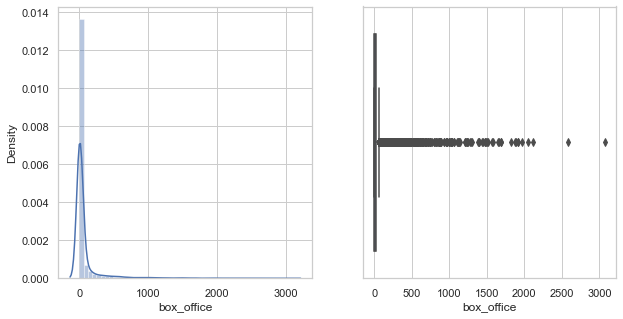

In [68]:
find_outliers(df, 'box_office')

In [69]:
len(df.query('box_office > (4*box_office.quantile(0.75) - 3*box_office.quantile(q=0.25))'))/len(df.query('box_office.notnull()'))

0.14014786242365798

In [70]:
len(df.query('box_office > (4*box_office.quantile(0.75) - 3*box_office.quantile(q=0.25))  and budget.notnull()'))/len(df.query('budget.notnull()'))

0.20209059233449478

Мы не можем удалить даже экстремальные выбросы, поскольку при этом потеряется 14% информации. Оставим данные как есть, но полученные результаты заставляют нас усомниться в их достоверности, необходимо дальнейшее уточнение правильности полученных значений сборов

In [71]:
box_office = df.pivot_table(index = 'year', values = 'box_office', aggfunc = ['sum', 'mean', 'median'])
box_office.columns = ['sum', 'mean', 'median']
box_office

,sum,mean,median
year,,,
2010,2.36,0.022692,0.00
2011,14.04,0.128807,0.00
2012,6.90,0.053906,0.01
2013,29.68,0.161304,0.00
2014,7444.82,26.876606,0.02
2015,38364.68,83.948972,4.77
2016,45207.87,87.442689,3.66
2017,39519.07,113.887810,9.39
2018,45379.89,97.173212,8.66


Построим соответствующие графики

Text(0.5, 1.0, 'Сумма сборов')

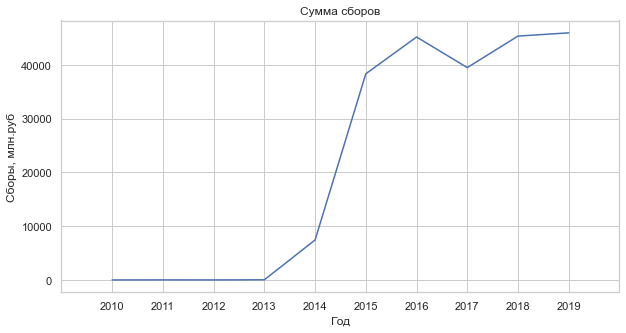

In [72]:
plt.plot(box_office['sum'])
plt.xlabel('Год')
plt.ylabel('Сборы, млн.руб')
plt.xlim(2009, 2020)
plt.xticks(ticks= [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], labels=None)
plt.title('Сумма сборов')

**Вывод**
Мы видим тот же минимум на графике, как и для количества прокатных фильмов и фильмов с прокатными удостовернениями - в 2017 году. После стабилизации международной экономической ситуации сборы начали планомерно расти и достигли максимального значения в 2019 году. Наши выводы подтверждаются сторонними данными с сайта Фонда Кино
https://www.fond-kino.ru/news/itogi-kinoprokata-v-2019-godu/
К сожалению, в связи с отсутствием более, чем половины данных - 58% NaN  в столбце, данные, полученные для периода 2010-2016 г.г. вызывают большие сомнения

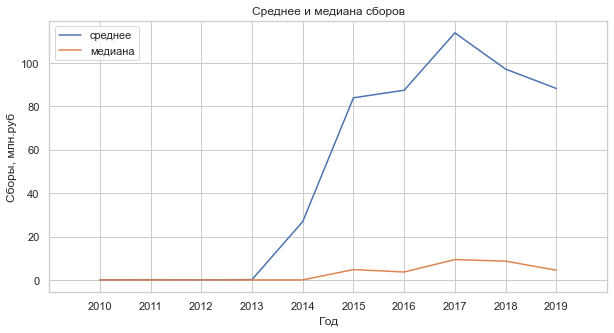

In [73]:
plt.plot(box_office['mean'], label = 'среднее')
plt.plot(box_office['median'], label = 'медиана')
plt.xlabel('Год')
plt.ylabel('Сборы, млн.руб')
plt.xlim(2009, 2020)
plt.xticks(ticks= [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], labels=None)
plt.title('Среднее и медиана сборов')
plt.legend(loc='upper left')

**Вывод** как и для суммы сборов мы не можем получить достоверные значения ввиду недостатка информации - в целом на данном графике наоборот в 2017 году был пик среднего и медианы сбора - в отличии от спада суммы сборов и количества фильмов в прокате. Такое можно объяснить только если количество фильмов уменьшилось гораздо быстрее, чем сумма сборов. Далее медиана и среднее уменьшаются - больше фильмов и возможностей выбора - меньше сбор отдельно взятого фильма


### Влияние возрастного ограничения на сборы фильма

Определим влияние возрастного ограничения на сумму сборов в прокате

In [74]:
df.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории     1204.92
«12+» - для детей старше 12 лет           54810.43
«16+» - для детей старше 16 лет           75378.84
«18+» - запрещено для детей               42974.69
«6+» - для детей старше 6 лет             47582.13
Name: box_office, dtype: float64

Мы видим, что за указанный период больше всего сборов в прокате у фильмов с возрастным ограничением «16+» - для детей старше 16 лет - что вполне возможно отражает основную целевую категорию посетителей кинотеатров/

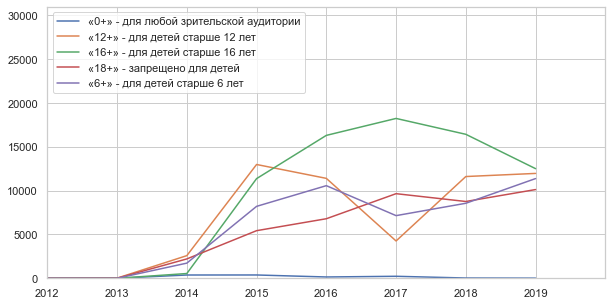

In [75]:
for name, grouped_data in df.groupby('age_restriction'):
    grouped_data = grouped_data.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
    plt.plot(grouped_data, label = name)
    plt.legend(loc='upper left')
    plt.xticks(ticks= [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], labels=None)
    plt.xlim(2012, 2020)
    plt.ylim(0, 31000)
    

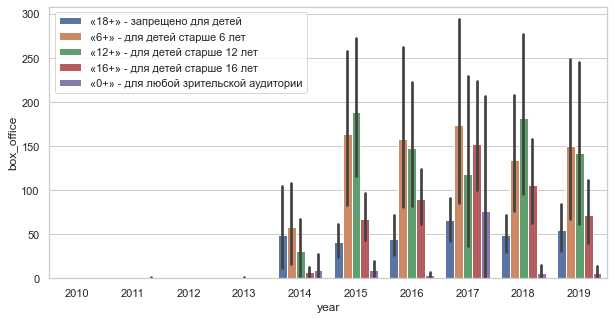

In [76]:
sns.barplot(data = df, x = 'year', y = 'box_office', hue = 'age_restriction')
plt.legend(loc='best')

**Вывод**
Проанализируем период с 2016 года, поскольку нехватка данных очень сильно искажает результаты для периода 2010-2016 г.г. 
- практически нулевые сборы для фильмов с маркировкой 0+ по всему изучаемому периоду. 
- сборы фильмов 6+ в целом выросли и лостигли своего максимума в 2019 г., минимум - 2017, аналогичная тенденция для фильмов 12+. Возможно в 2017 году, киноиндустрия выпускала меньше фильмов для детей, сократив расходы на финансирования продукции именно для этой возрастной категории.
- для фильмов 16+ - максимум наблюдался в 2017 году, затем сборы пошли на спад и достигли своего минимума в 2019 году - ровно через два года, когда зрители категории 16+ перешли в категрию 18+. Необходимо дополнительное исследования по возрастным категориям зрителей кинотеатра
- для фильмов 18+ после достаточно хорошего роста с 2016 по 2017 г.г. наблюдается стагнация

## Исследование фильмов, получивших господдержку
Создадим отдельный dataframe  с такими фильмами, а также dataframe только с фильмами российского производства для выявления трендов

In [77]:
state_support = df.query('budget.notnull()')

In [78]:
observe_data(state_support)

Случайная запись таблицы


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,ratio_state_support,director_name,main_genre
6814,Кроличья лапа,111018919,2019-11-20 12:00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.0,30.0,47.73,Министерство культуры,NaN,unknown,NaN,2019,63.0,Н.Джорджадзе,unknown


____________________________________________________________________________________________________
Количество записей в таблице: 287 
Kоличество столбцов в таблице: 20
____________________________________________________________________________________________________
Названия столбцов: Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'year',
       'ratio_state_support', 'director_name', 'main_genre'],
      dtype='object')
____________________________________________________________________________________________________
Название столбцов корректно
____________________________________________________________________________________________________
Пропущенные значения в абсолютном и относительном выражениях:


,missed_values,percent
title,0,0.0
pu_number,0,0.0
show_start_date,0,0.0
type,0,0.0
film_studio,0,0.0
production_country,0,0.0
director,0,0.0
producer,0,0.0
age_restriction,0,0.0
refundable_support,0,0.0


____________________________________________________________________________________________________
Типы данных в колонках:
title                            object
pu_number                         int32
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
year                              int64
ratio_state_support             float64
director_name                    object
main_genre                       object
dtype: object
_____________________________________________________________

Удалим из полученной таблицы записи с NaN

In [79]:
state_support = state_support.dropna()

### Наиболее популярные жанры

Посмотрим каким жанрам государство предоставляет поддержку чаще всего и фильмы каких жанров в целом предпочитают снимать в России

In [80]:
state_support['main_genre'].value_counts().head(10)

драма         78
комедия       65
мультфильм    18
триллер       15
мелодрама     14
военный        9
ужасы          9
фэнтези        8
фантастика     7
боевик         6
Name: main_genre, dtype: int64

In [81]:
df['main_genre'].value_counts().head(10)

драма         1574
unknown        970
комедия        651
боевик         547
ужасы          526
мультфильм     504
триллер        483
фантастика     367
мелодрама      336
фэнтези        303
Name: main_genre, dtype: int64

**Вывод: в подавляющем большинстве случаев гос.поддержка оказывается фильмам в жанре драма и комедия. По всем фильмам мы в который раз убеждаемся в недостаточности информации, но  если не принимать в расчет фильмы с неизвестными жанрами, то в трендах присутствуют те же саме жанры, что и для фильмов с гос.поддержкой, хотя и в ином порядке**

### Финансирование по годам

Рассмотрим, как осуществлялось финансирование фильмов по времени, для этого в таблице `state_support` создадим столбец с общей суммой гос.поддержки

In [82]:
state_support['total_support'] = state_support['refundable_support'] + state_support['nonrefundable_support']

Визиализируем необходимые данные

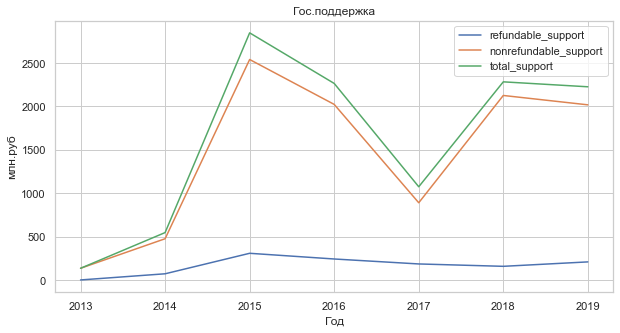

In [83]:
for col in ['refundable_support', 'nonrefundable_support', 'total_support']:
    plt.plot(state_support.pivot_table(index = 'year', values = col, aggfunc = 'sum'), label = col)
    plt.legend(loc='best')
    plt.title('Гос.поддержка')
    plt.xlabel('Год')
    plt.ylabel('млн.руб')
    

**Выводю мы видим, что объем возратной помощи весьма незначителен и практически не изменяется по годам и в целом не превышает 250 млн.руб. в год, в то время как объем невозратной помощи от государства после кризиса 2016-2017 г.г. с минимумом в 1 млрд.руб неуклонно растет, максимум наблюдался в 2015 году с общим объемом невозратной гос.поддержки более 2,5 млрд руб.**

### Зависимость объема гос.поддерджки от бюджета

Рассмотрим коррелирует ли гос.поддержка с общем бюджетом фильма

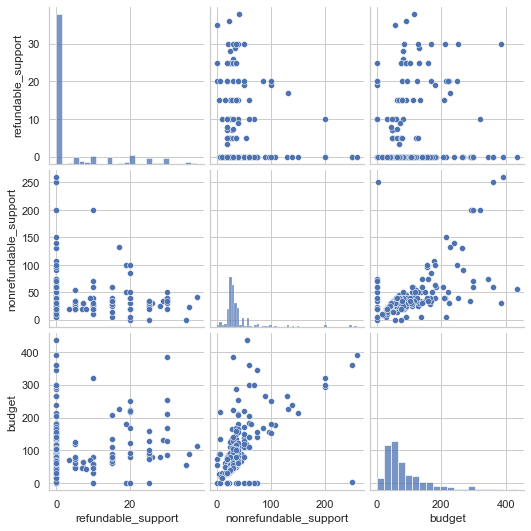

In [84]:
sns.pairplot(state_support[['refundable_support', 'nonrefundable_support', 'budget']])

По графикам видно, что возможно присутствует корреляция между `budget` и `nonrefundable_support`, а также наглядно представлено отсутствие корреляции между `budget` и `refundable_support`. Рассчитаем коэффициенты корреляции

<AxesSubplot:>

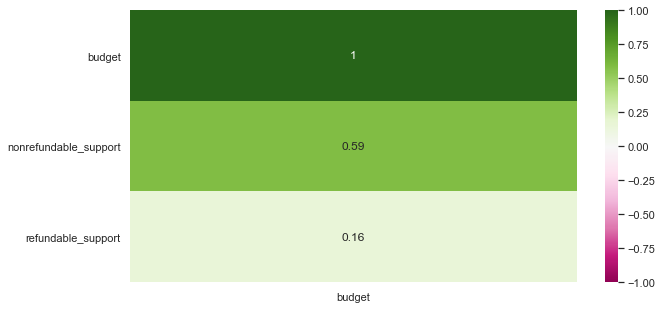

In [85]:
sns.heatmap(state_support[['refundable_support', 'nonrefundable_support', 
    'budget']]
            .corr()[['budget']]
            .sort_values(by = 'budget', ascending = False), vmax = 1, vmin = -1, cmap ="PiYG", annot= True)

**Вывод: скорее всего объем невозратной помощи пропорционален бюджету фильма, поскольку коэффициент корреляции между данными величинами соответствует средней корреляции, возможно, сумма гос.помощи в таком случае рассчитывается по формуле, включающей бюджет. С другой стороны, объем возрастных средств не зависит линейно от бюджета фильма, вполне возможно сумма невозратной помощи имеет определнное установление вне зависимости от бюджета значение**

### Зависимость сбора от бюджета

Рассмотрим, зависит ли сборы фильма от затраченных на его создание средств.

<AxesSubplot:xlabel='budget', ylabel='box_office'>

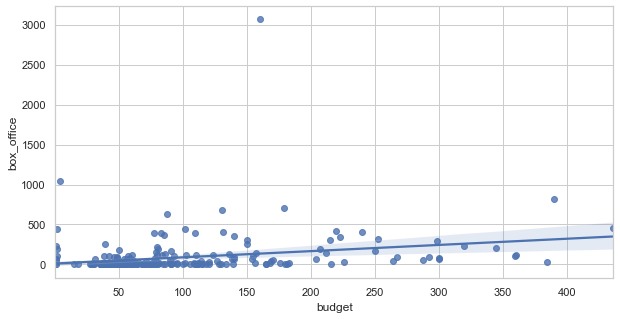

In [86]:
sns.regplot(data = state_support, x = 'budget', y = 'box_office')

In [87]:
state_support['budget'].corr(state_support['box_office'])

0.25536763072981444

**Вывод: низкий коэффициент корреляции говорить об отсутствии линейной зависимости между кассовыми сборами и бюджетом фильма**

### Рейтинг

Посмотрим средний рейтинг фильмов с гос.финансированием и всех российских фильмов

In [88]:
state_support['ratings'].median()

6.2

In [89]:
df['ratings'].median()

6.6

В целом, фильмы с господдержкой характеризуются меньшим рейтингом, чем все фильмы, имеющие прокатное удостоверение

Посмотрим как менялся рейтинг фильмов по годам

Text(0, 0.5, 'Рейтинг')

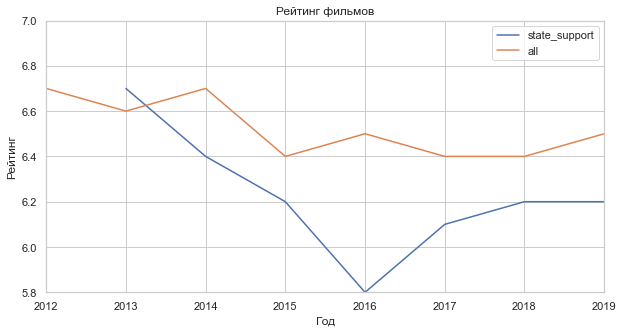

In [90]:
plt.plot(state_support.pivot_table(index = 'year', values = 'ratings', aggfunc = 'median'), label = 'state_support')
plt.plot(df.pivot_table(index = 'year', values = 'ratings', aggfunc = 'median'), label = 'all')
plt.legend()
plt.xlim(2012, 2019)
plt.ylim(5.8, 7)
plt.title('Рейтинг фильмов')
plt.xlabel('Год')
plt.ylabel('Рейтинг')

**Вывод: Временное изменение рейтинга показывает, что рейтинг фильмов с гос.поддержкой возрастал, начиная с 2016 года, с последующей стагнацией. Наименьший рейтинг для данных фильмов наблюдался в 2016 году, как собственно говоря и для всех российских фильмов - кризис, денег нет снимать хорошее кино, но надо хоть что-то снять. Для всех фильмов за последнее время наблюдается стагнация рейтинга на уровне 6,5 после его обвала в 2014 г**

### Окупаемость фильмов

Посмотрим, окупали ли себя фильмы с гос.поддержкой за счет кассовых сборов

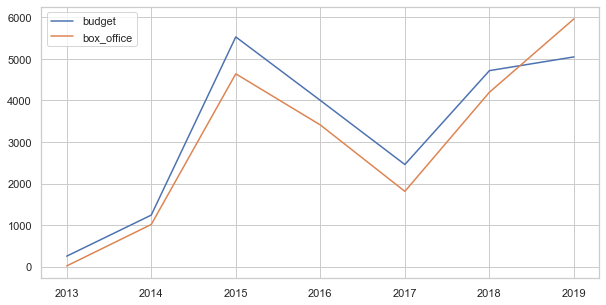

In [91]:
for col in ['budget', 'box_office']:
    plt.plot(state_support.pivot_table(index = 'year', values = col, aggfunc = 'sum'), label = col)
    plt.legend(loc='best')

А сейчас посмотрим аналогичные графики, но не для суммы значений, а для медианы

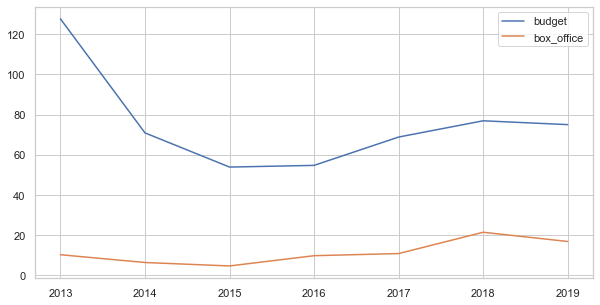

In [92]:
for col in ['budget', 'box_office']:
    plt.plot(state_support.pivot_table(index = 'year', values = col, aggfunc = 'median'), label = col)
    plt.legend(loc='best')

**Вывод: в среднем бюджет фильма с гос.поддержкой составляет от 60 до 80 млн.руб, при этом кассовые сборы в большинстве случаев не превышают 20 млн.руб. То есть у среднестатистического фильма с гос.поддержкой практически нет шансов себя окупить засчет проката в кинотеатрах. Если мы рассмотрим общую картину, то только с середины 2018 года общий бюджет всех российских фильмов с гос.поддержкой меньше общего объема кассовых сборов**

In [93]:
df['ratio_budget_box'] = df['box_office']/df['budget']
print(len(df.query('ratio_budget_box >= 1'))/len(df.query('ratio_budget_box.notnull()')))

0.21454545454545454


**Вывод: из всех фильмов с господдержкой окупилось за счет проката около 21,5%**

### Возрастные ограничения

In [94]:
state_support['age_restriction'].value_counts()


«16+» - для детей старше 16 лет           110
«12+» - для детей старше 12 лет            75
«6+» - для детей старше 6 лет              43
«18+» - запрещено для детей                26
«0+» - для любой зрительской аудитории      4
Name: age_restriction, dtype: int64

In [95]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2580
«12+» - для детей старше 12 лет           1499
«18+» - запрещено для детей               1486
«0+» - для любой зрительской аудитории     783
«6+» - для детей старше 6 лет              603
Name: age_restriction, dtype: int64

**Вывод: в целом наибольшее количество российских  фильмов c гос.поддержкой предназначено для возрастных категорий +16 и +12. Значительное количество фильмов с прокатными удостоверениями в целом ориентировано на возрастные категории 16+ 12+ и 18+, то есть на более возрастную группу зрителей**

### Количество российских фильмов, получивших гос.поддержку

Посмотрим какое количество российских фильмов от их общего числа получило гос.поддержку

In [96]:
russian_films = (df.query('production_country == "Россия"')
                .groupby('year')[['production_country', 'budget']]
                .count()
                .rename(columns = {'production_country':'russian_films', 'budget': 'state_support'}))
russian_films['ratio'] = round(russian_films['state_support']/russian_films['russian_films']*100, 1)


Text(0, 0.5, '%')

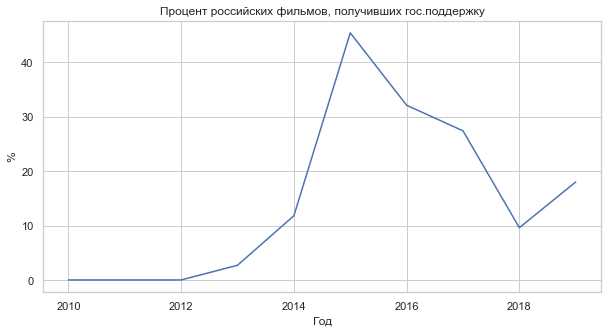

In [97]:
plt.plot(russian_films['ratio'])
plt.title('Процент российских фильмов, получивших гос.поддержку')
plt.xlabel('Год')
plt.ylabel('%')

**Вывод: наибольший процент фильмов с гос.поддержкой наблюдался в 2015 году, до экономического кризиса, затем финансирование скорее всего было урезано, и количество фильмов с гос.поддержкой уменьшалось, при этом положительная тенденция наблюдается только с 2018 года, когда объем фильмов с поддержкой составил около 20% от всех российских фильмов, получивших прокатное удостоверениуе**

## Общий вывод

В ходе проведенного исследования:

**Гипотеза 1** - не подтвердилась - фильмы с гос.поддержкой не особо интересны зрителю. Их рейтинг составляет в целом 6.2, и не превышал за весь период времени 6,7. Рейтинг всех фильмов составляет в среднем 6.6, то есть на 0.4 пункта выше. Такие фильмы не окупаются (впрочем как и все российские фильмы) за счет кассовых сборов - средний дефицит составляет 30 млн.руб. Положительная тенденция наметилась только с середины 2018 года

**Гипотеза 2** - подтвердилась частично - для всех фильмов, в  том числе и российских фильмов с гос.поддержкой преобладают такие жанры как драма и комедия. Присутствуют упомянутые различия в рейтинге и возрастных категориях - большее количество фильмов предназначено для возрастных категорий +16 и +12 и +18 в то время как для фильмы с гос.поддержкой в своем большинстве имеют маркировку +12 и +16, таким образом они ориентированы на менее взрослую публику. 
Кроме того:
- проведена предварительная обработка данных, которая выявила необходимость перепроверки качества исходной информации из-за ее неполноты и необновленности. Также полученны данные для оформления bug report:
*Для фильмов с одинаковыми названиями, но не являющимися идентичными, настроить более точную выгрузку информации с Кинопоиска, не только на основе названия фильма, но и его дополнительных атрибутов c целью корректного определения жанра и рейтинга, поскольку разные фильмы с одинаковыми названиями имеют один и тот же жанр и рейтинг, что не является правдой - вся информация для баг репорта - в п.2.4*
и *запроса в техническую службу с целью проверки полноты выгружаемой информации*
- удалены экстремальные выбросы в количестве 54 записей для количественных переменных
**Установлены следующие зависимости:**
- макисмальные значения количества фильмов с прокатным удостоверением, как и количества фильмов в прокате характерны для последнего в исследовании 2019 года - киноиндустрия развивается, производится все больше и больше фильмов, которые выходят в прокат или получают прокатные удостоверения. С 2016 года наблюдается падение количества фильмов - при этом падение количества фильмов с прокатным удостоверением сильнее, чем падение числа фильмов в прокате. Возможно это связано с принятием постановления об изменениях в требованиях к получению прокатного удостовернения от 27 февраля 2016. Нельзя не брать и в расчеты экономический кризис 2016-2017 г., повлиявший в целом и на объемы выпуска кинопродукции
- минимальная сумма сборов - в 2017 году. После стабилизации международной экономической ситуации сборы начали планомерно расти и достигли максимального значения в 2019 году. 
- как и для суммы сборов мы не можем получить достоверные значения для медианы и среднего ввиду недостатка информации - в целом на данном графике наоборот в 2017 году был пик среднего и медианы сбора - в отличии от спада суммы сборов и количества фильмов в прокате. Такое можно объяснить только если градиент уменьшения количество фильмов больше градиента уменьшения суммы сборов. После 2017 г медиана и среднее сборов уменьшаются - больше фильмов и возможностей выбора - меньше сбор отдельно взятого фильма
- практически нулевые сборы для фильмов с маркировкой 0+ по всему изучаемому периоду. Сборы фильмов 6+ в целом росли и лостигли своего максимума в 2019 г., минимум - 2017, аналогичная тенденция для фильмов 12+. Возможно в 2017 году, киноиндустрия выпускала меньше фильмов для детей, сократив расходы на финансирования продукции именно для этой возрастной категории.Для фильмов 16+ - максимум наблюдался в 2017 году, затем сборы пошли на спад и достигли своего минимума в 2019 году - ровно через два года, когда зрители категории 16+ перешли в категрию 18+. Необходимо дополнительное исследования по возрастным категориям зрителей кинотеатра. Для фильмов 18+ после достаточно хорошего роста с 2016 по 2017 г.г. наблюдается стагнация
**Для фильмов с гос.поддержкой:**
- объем возратной помощи весьма незначителен и практически не изменяется по годам и в целом не превышает 250 млн.руб. в год, в то время как объем невозратной помощи от государства после кризиса 2016-2017 г.г. с минимумом в 1 млрд.руб неуклонно растет, максимум наблюдался в 2015 году с общим объемом невозратной гос.поддержки более 2,5 млрд руб.
- отсутствие какой-либо взаимосвязи между кассовыми сборами и бюджетом фильма
- наибольший процент фильмов с гос.поддержкой наблюдался в 2015 году, до экономического кризиса, затем финансирование скорее всего было урезано, и количество фильмов с гос.поддержкой уменьшалось, при этом положительная тенденция наблюдается только с 2018 года, когда объем фильмов с поддержкой составил около 20% от всех российских фильмов, получивших прокатное удостоверение

**Call for action:**
- bug report 
- запрос в техническую службу для улучшения качества и полноты выгружаемой информации
- проведение отдельного исследования по возрастным группам зрителей  и их предпочтениям - кто диктует тренды
- привлечение дополнительных источников информации по сборам не только российских, но и зарубежных фильмов, а также их бюджету